In [1]:
# Agglomerative Clustering (bottom-up approach)

from sklearn.cluster import AgglomerativeClustering
import numpy as np
x = np.array([[1,2], [1,4], [1,0], [4,2], [4,4], [4,0]])
clustering = AgglomerativeClustering(n_clusters=2).fit(x)
print(clustering.labels_)

[1 1 1 0 0 0]


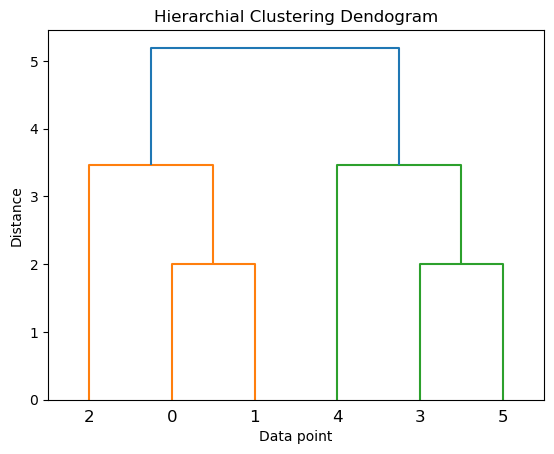

In [5]:
# Divisive Clustering (Top-down clustering)

import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

X = np.array([[1,2], [1,4], [1,0], [4,2], [4,4], [4,0]])
z = linkage(X, 'ward')
dendrogram(z)
plt.title('Hierarchial Clustering Dendogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

***Applying Clustering Techniques upon marketing_campaign1.csv***

In [63]:
# Performing clustering techniques upon marketing_campaign.csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('marketing_campaign1.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [64]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [65]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [66]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [67]:
df = pd.get_dummies(df, drop_first=True)

In [73]:
df.fillna(df.mean(), inplace=True)

In [76]:
df.isnull().sum()

ID                        0
Year_Birth                0
Income                    0
Kidhome                   0
Teenhome                  0
                         ..
Dt_Customer_31-08-2012    0
Dt_Customer_31-08-2013    0
Dt_Customer_31-10-2012    0
Dt_Customer_31-12-2012    0
Dt_Customer_31-12-2013    0
Length: 699, dtype: int64

In [95]:
# Convert categorical columns to numeric
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

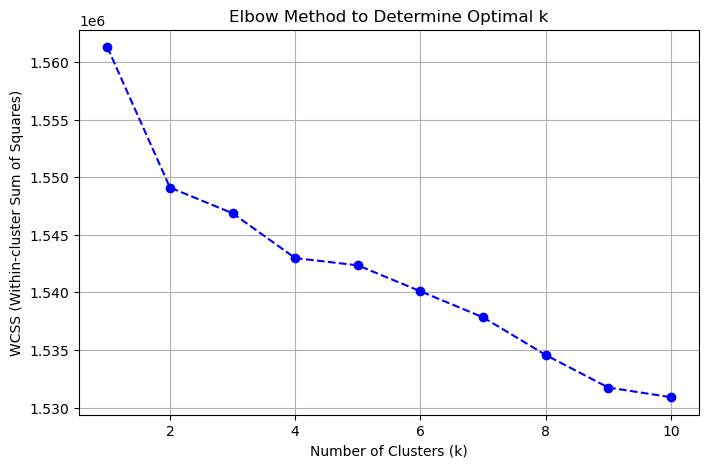

In [77]:
scaler = StandardScaler()
X1 = scaler.fit_transform(df)
wcss = []  
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid()
plt.show()

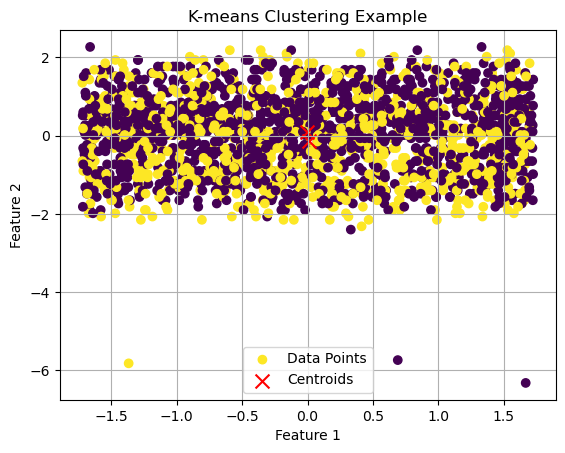

In [111]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_labels = kmeans.fit_predict(X1)
df['KMeans_Cluster'] = kmeans_labels
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans_labels, cmap='viridis', marker='o', label='Data Points')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-means Clustering Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

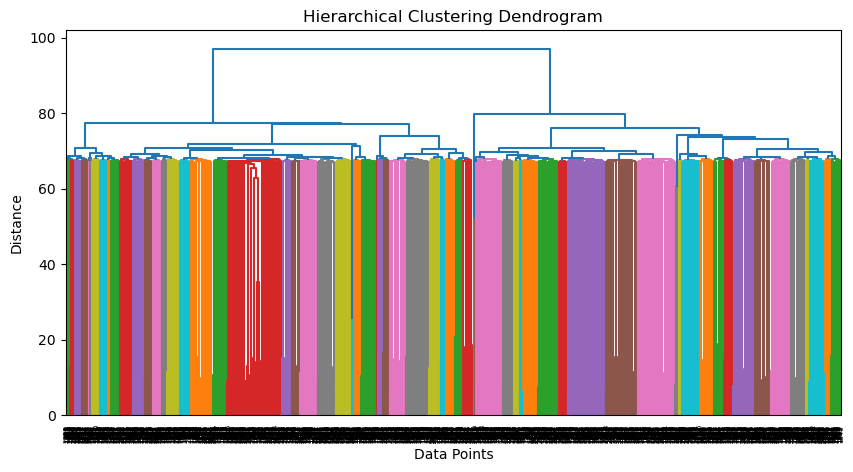

In [103]:
# Agglomerative Clustering (Hierarchical)
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(X1)
df['Agglomerative_Cluster'] = agglomerative_labels
Z = linkage(X1, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

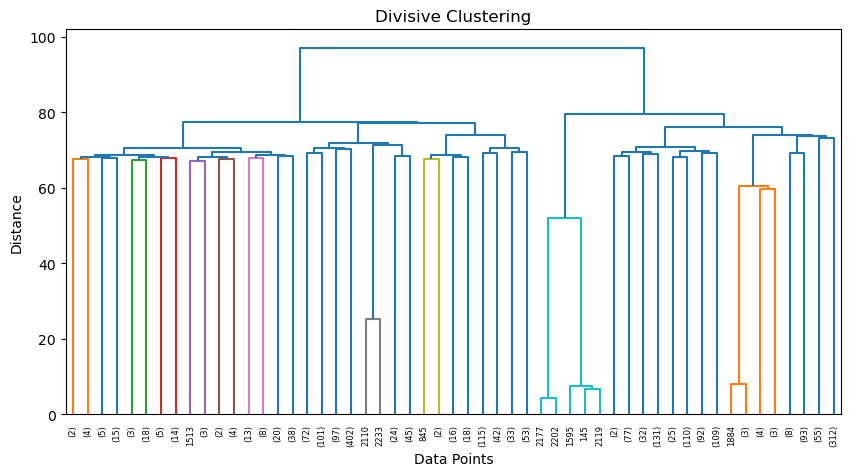

In [104]:
# Divisive Clustering 
Z_divisive = linkage(X1, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z_divisive, truncate_mode='level', p=5)
plt.title('Divisive Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
